In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/


/content/drive/MyDrive


In [15]:
import zipfile
import os

# Define the path to the ZIP file
zip_path = '/content/drive/MyDrive/Projects_academics/PROJECTS_Purpose/Under_water_image/UWID10.zip'

# Define the path to the destination folder
dest_path = '/content/dataset'

# Create the destination folder if it doesn't exist
if not os.path.exists(dest_path):
    os.makedirs(dest_path)

# Open the ZIP file for reading
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract all files to the destination folder
    zip_ref.extractall(dest_path)


In [18]:
import os

# Define the path to the directory containing the classes
directory = '/content/dataset'

# Get a list of all subdirectories (i.e., class folders) in the directory
class_folders = [f.path for f in os.scandir(directory) if f.is_dir()]

# Print the number of classes
print("Number of classes:", len(class_folders))

# Loop through each class folder and print the class name and the number of images inside the folder
for folder in class_folders:
    # Get the class name from the folder name
    class_name = os.path.basename(folder)

    # Get a list of all image files in the folder
    images = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

    # Print the class name and the number of images
    print("Class:", class_name, "- Number of images:", len(images))


Number of classes: 10
Class: Starfish - Number of images: 499
Class: Otter - Number of images: 500
Class: Whale - Number of images: 500
Class: Fish - Number of images: 494
Class: Sea_Urchins - Number of images: 500
Class: Sea_Rays - Number of images: 500
Class: Turtle - Number of images: 507
Class: Clams - Number of images: 497
Class: Penguin - Number of images: 482
Class: Jelly_Fish - Number of images: 500


In [17]:
import shutil
import os

folder_path = '/content/dataset/.ipynb_checkpoints'

# Check if the folder exists
if os.path.exists(folder_path):
    # Remove the folder and all its contents
    shutil.rmtree(folder_path)
    print(f"Folder '{folder_path}' removed successfully!")
else:
    print(f"Folder '{folder_path}' does not exist.")


Folder '/content/dataset/.ipynb_checkpoints' removed successfully!


In [19]:
import os
import random
import shutil

# Set up the paths to the original dataset folder and the new train and test folders
original_dir = "/content/dataset"
train_dir = "/content/TRAIN10"
test_dir = "/content/TEST10"

# Set the percentage of images to use for training (the rest will be used for testing)
train_percentage = 0.7

# Create the train and test folders if they don't already exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Loop through each subdirectory in the original dataset folder
for sub_dir_name in os.listdir(original_dir):
    sub_dir_path = os.path.join(original_dir, sub_dir_name)

    # Check if the item in original_dir is a directory
    if not os.path.isdir(sub_dir_path):
        continue

    # Create corresponding subdirectories in the train and test folders
    train_sub_dir_path = os.path.join(train_dir, sub_dir_name)
    test_sub_dir_path = os.path.join(test_dir, sub_dir_name)
    if not os.path.exists(train_sub_dir_path):
        os.makedirs(train_sub_dir_path)
    if not os.path.exists(test_sub_dir_path):
        os.makedirs(test_sub_dir_path)

    # Split the files in the subdirectory between train and test
    file_list = os.listdir(sub_dir_path)
    random.shuffle(file_list)
    split_point = int(len(file_list) * train_percentage)

    for file_name in file_list[:split_point]:
        src_path = os.path.join(sub_dir_path, file_name)
        dst_path = os.path.join(train_sub_dir_path, file_name)
        shutil.copy(src_path, dst_path)

    for file_name in file_list[split_point:]:
        src_path = os.path.join(sub_dir_path, file_name)
        dst_path = os.path.join(test_sub_dir_path, file_name)
        shutil.copy(src_path, dst_path)

print("Successfully split dataset into train and test sets!")


Successfully split dataset into train and test sets!


In [20]:
import os

# Define the path to the directory containing the classes
directory = '/content/TRAIN10'

# Get a list of all subdirectories (i.e., class folders) in the directory
class_folders = [f.path for f in os.scandir(directory) if f.is_dir()]

# Print the number of classes
print("Number of classes:", len(class_folders))

# Loop through each class folder and print the class name and the number of images inside the folder
for folder in class_folders:
    # Get the class name from the folder name
    class_name = os.path.basename(folder)

    # Get a list of all image files in the folder
    images = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

    # Print the class name and the number of images
    print("Class:", class_name, "- Number of images:", len(images))


Number of classes: 10
Class: Starfish - Number of images: 349
Class: Otter - Number of images: 350
Class: Whale - Number of images: 350
Class: Fish - Number of images: 345
Class: Sea_Urchins - Number of images: 350
Class: Sea_Rays - Number of images: 350
Class: Turtle - Number of images: 354
Class: Clams - Number of images: 347
Class: Penguin - Number of images: 337
Class: Jelly_Fish - Number of images: 350


In [21]:
import os

# Define the path to the directory containing the dataset
dataset_path = "/content/TEST10"

# Get the class names from the subdirectories in the dataset directory
class_names = os.listdir(dataset_path)

print(class_names)


['Starfish', 'Otter', 'Whale', 'Fish', 'Sea_Urchins', 'Sea_Rays', 'Turtle', 'Clams', 'Penguin', 'Jelly_Fish']


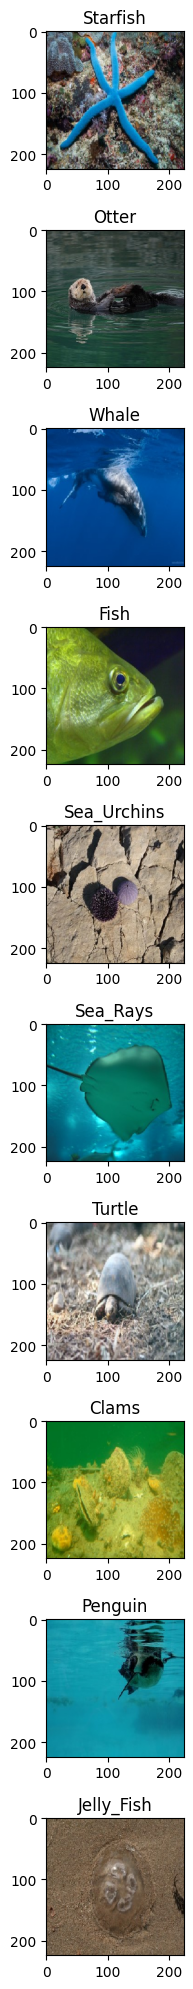

In [22]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# Define the path to the directory containing all the images
data_dir = "/content/dataset"

# Create the data generator
datagen = ImageDataGenerator(rescale=1./255)

# Get the class names from the directory
class_names = os.listdir(data_dir)

# Plot one image from each class
fig, axs = plt.subplots(nrows=len(class_names), ncols=1, figsize=(5, 20))

for i, class_name in enumerate(class_names):
    # Get all the image paths in the class directory
    image_paths = [os.path.join(data_dir, class_name, img_name) for img_name in os.listdir(os.path.join(data_dir, class_name))]

    # Choose a random image from the class directory
    image_path = random.choice(image_paths)

    # Load the image and resize it to (224, 224) for visualization
    image = load_img(image_path, target_size=(224, 224))

    # Plot the image
    axs[i].imshow(image)
    axs[i].set_title(class_name)

plt.tight_layout()
plt.show()

In [23]:
import os

dataset_path = "/content/dataset"

# Get a list of class names by finding the subdirectories in the dataset directory
class_names = sorted(os.listdir(dataset_path))

# Print the class names and their assigned numbers
print("Class numbers assigned to each class:")
for i, class_name in enumerate(class_names):
    class_path = os.path.join(dataset_path, str(class_name))
    print(f"{class_name}: {i}")


Class numbers assigned to each class:
Clams: 0
Fish: 1
Jelly_Fish: 2
Otter: 3
Penguin: 4
Sea_Rays: 5
Sea_Urchins: 6
Starfish: 7
Turtle: 8
Whale: 9


In [25]:
import os

# Set the path to the folder containing the classes
folder_path = "/content/dataset"

# Get a list of the class names
class_names = os.listdir(folder_path)

# Sort the class names alphabetically
class_names = sorted(class_names)

# Print the sorted class names
print(class_names)


['Clams', 'Fish', 'Jelly_Fish', 'Otter', 'Penguin', 'Sea_Rays', 'Sea_Urchins', 'Starfish', 'Turtle', 'Whale']


In [26]:
import os

# Set the path to the folder containing the classes
folder_path = "/content/dataset"

# Get a list of the class names
class_names = os.listdir(folder_path)



# Print the sorted class names
print(class_names)


['Starfish', 'Otter', 'Whale', 'Fish', 'Sea_Urchins', 'Sea_Rays', 'Turtle', 'Clams', 'Penguin', 'Jelly_Fish']


In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/TRAIN10' # replace with the path to the train folder
val_dir = '/content/TEST10' # replace with the path to the validation folder
batch_size = 32

# define the data generator with image augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255, # normalize pixel values between 0 and 1
    rotation_range=20, # rotate images randomly up to 20 degrees
    width_shift_range=0.1, # shift images horizontally by up to 10% of the width
    height_shift_range=0.1, # shift images vertically by up to 10% of the height
    shear_range=0.1, # apply shear transformation randomly up to 10%
    zoom_range=0.1, # zoom images randomly up to 10%
    horizontal_flip=True, # flip images horizontally randomly
    fill_mode='nearest' # fill any empty pixels with the nearest value
)

# define the data generator without augmentation for validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# define the train data generator
train_generator = train_datagen.flow_from_directory(
    train_dir, # path to the train directory
    target_size=(224, 224), # resize images to 224x224
    batch_size=batch_size,
    classes=['Whale', 'Turtle', 'Starfish', 'Sea_Urchins', 'Sea_Rays', 'Penguin', 'Otter', 'Jelly_Fish', 'Fish', 'Clams'],
    class_mode='categorical' # use categorical cross-entropy loss
)

# define the validation data generator
val_generator = val_datagen.flow_from_directory(
    val_dir, # path to the validation directory
    target_size=(224, 224), # resize images to 224x224
    batch_size=batch_size,
    class_mode='categorical', # use categorical cross-entropy loss
    classes=['Whale', 'Turtle', 'Starfish', 'Sea_Urchins', 'Sea_Rays', 'Penguin', 'Otter', 'Jelly_Fish', 'Fish', 'Clams'],
    shuffle=False
)


Found 3482 images belonging to 10 classes.
Found 1497 images belonging to 10 classes.


In [28]:
# import necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.regularizers import l2

img_height = 224
img_width = 224
num_classes = 10

# define the InceptionV3 model
base_model = InceptionV3(weights='imagenet',
                         include_top=False,
                         input_shape=(img_height, img_width, 3))

# set the layers of the base model as non-trainable
for layer in base_model.layers:
    layer.trainable = False

# define the model architecture
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)

predictions = Dense(num_classes, activation='softmax')(x)

# define the full model
model = Model(inputs=base_model.input, outputs=predictions)

# set the layers of the base model as trainable for fine-tuning
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True

# compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])






87910968/87910968 [==============================] - 0s 0us/step


In [42]:
# train the model
epochs = 10
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator)

Epoch 1/10
109/109 [==============================] - 52s 477ms/step - loss: 1.2750 - accuracy: 0.9431 - val_loss: 1.2740 - val_accuracy: 0.9319
Epoch 2/10
109/109 [==============================] - 48s 437ms/step - loss: 1.0686 - accuracy: 0.9704 - val_loss: 1.1943 - val_accuracy: 0.9325
Epoch 3/10
109/109 [==============================] - 50s 459ms/step - loss: 0.9407 - accuracy: 0.9782 - val_loss: 1.0800 - val_accuracy: 0.9385
Epoch 4/10
109/109 [==============================] - 49s 452ms/step - loss: 0.8389 - accuracy: 0.9805 - val_loss: 1.0171 - val_accuracy: 0.9299
Epoch 5/10
109/109 [==============================] - 50s 456ms/step - loss: 0.7432 - accuracy: 0.9859 - val_loss: 0.9560 - val_accuracy: 0.9325
Epoch 6/10
109/109 [==============================] - 48s 436ms/step - loss: 0.6695 - accuracy: 0.9842 - val_loss: 0.8419 - val_accuracy: 0.9332
Epoch 7/10
109/109 [==============================] - 49s 454ms/step - loss: 0.5925 - accuracy: 0.9854 - val_loss: 0.7771 - val_ac

In [51]:
model.save("/content/drive/MyDrive/UWID310.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


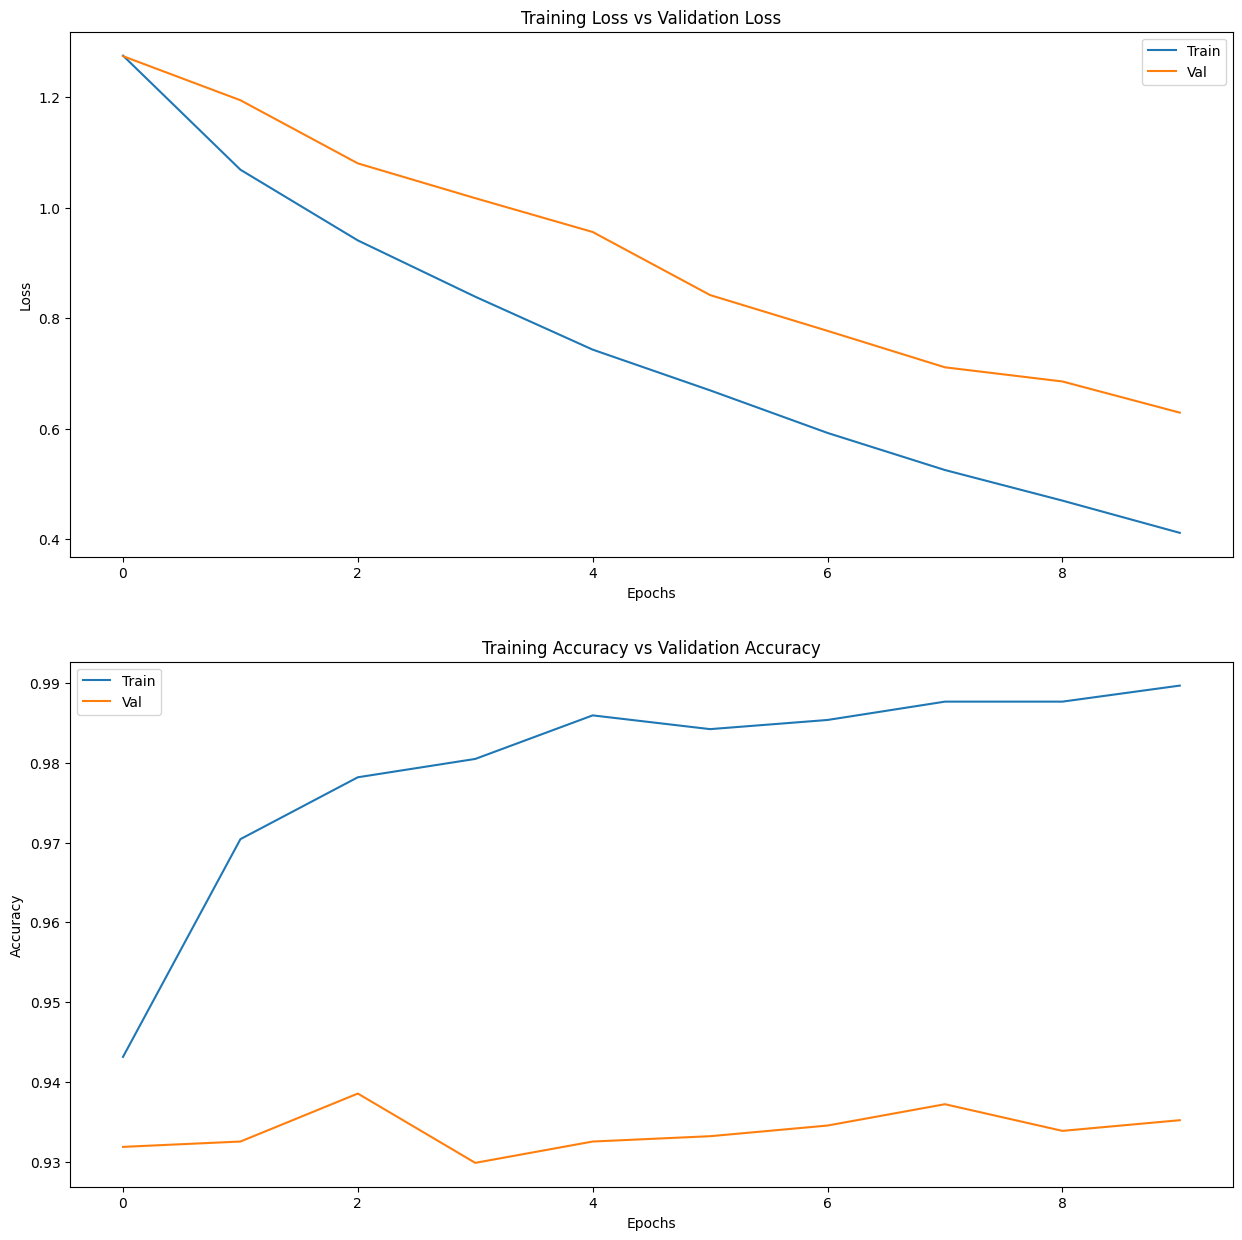

In [43]:
# create a figure with 2 subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 15))

# plot training loss and validation loss on the first subplot
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Val'])

# plot training accuracy and validation accuracy on the second subplot
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [44]:
import numpy as np
import sklearn.metrics as metrics

# Generate predictions
y_pred = model.predict(val_generator)
y_pred = np.argmax(y_pred, axis=1)

# Generate true labels
y_true = val_generator.classes

# Calculate and print the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
print(confusion_matrix)

# Generate and print the classification report
classification_report = metrics.classification_report(y_true, y_pred)
print("Classification Report:")
print(classification_report)

47/47 [==============================] - 4s 75ms/step
[[131   1   0   0   9   3   0   1   5   0]
 [  2 142   1   0   2   1   0   1   1   3]
 [  0   0 146   0   0   0   0   0   0   4]
 [  0   2   0 147   0   0   0   0   1   0]
 [  1   0   0   0 139   5   0   1   2   2]
 [  1   1   1   0   3 135   0   0   3   1]
 [  0   0   0   0   0   0 150   0   0   0]
 [  1   2   0   0   3   0   0 139   2   3]
 [  0   0   0   0   9   0   0   1 136   3]
 [  2   1   1   0   3   1   0   0   7 135]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       150
           1       0.95      0.93      0.94       153
           2       0.98      0.97      0.98       150
           3       1.00      0.98      0.99       150
           4       0.83      0.93      0.87       150
           5       0.93      0.93      0.93       145
           6       1.00      1.00      1.00       150
           7       0.97      0.93      0.95       150
     

In [45]:
import numpy as np
from sklearn.metrics import classification_report

# Generate predictions
y_pred = model.predict(val_generator)
y_pred = np.argmax(y_pred, axis=1)

# Generate true labels
y_true = val_generator.classes

# Get class labels
class_labels = list(val_generator.class_indices.keys())

# Generate and print classification report
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)


47/47 [==============================] - 4s 74ms/step
              precision    recall  f1-score   support

       Whale       0.95      0.87      0.91       150
      Turtle       0.95      0.93      0.94       153
    Starfish       0.98      0.97      0.98       150
 Sea_Urchins       1.00      0.98      0.99       150
    Sea_Rays       0.83      0.93      0.87       150
     Penguin       0.93      0.93      0.93       145
       Otter       1.00      1.00      1.00       150
  Jelly_Fish       0.97      0.93      0.95       150
        Fish       0.87      0.91      0.89       149
       Clams       0.89      0.90      0.90       150

    accuracy                           0.94      1497
   macro avg       0.94      0.94      0.94      1497
weighted avg       0.94      0.94      0.94      1497



47/47 [==============================] - 3s 71ms/step


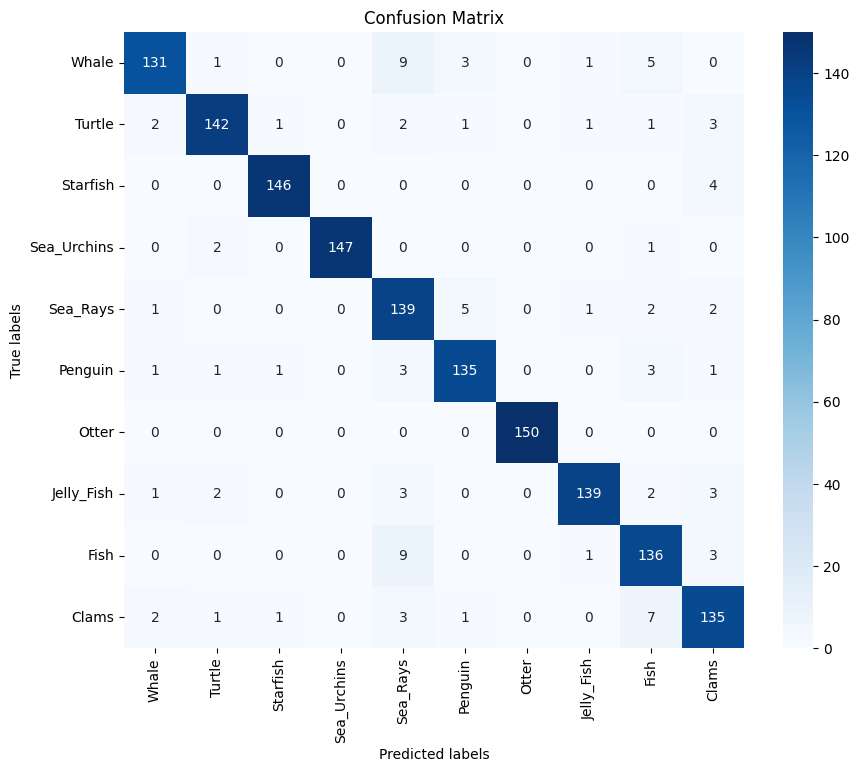

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics

# Generate predictions
y_pred = model.predict(val_generator)
y_pred = np.argmax(y_pred, axis=1)

# Generate true labels
y_true = val_generator.classes

# Calculate confusion matrix
confusion_matrix = metrics.confusion_matrix(y_true, y_pred)

# Get class names from the generator
class_names = list(val_generator.class_indices.keys())

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names, ax=ax)

# Add labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()


In [ ]:
import os

dataset_path = "/content/drive/MyDrive/test"

# Define a dictionary to map each class name to a unique number
class_to_idx = {'Clams': 0, 'Fish': 6, 'Jelly_Fish': 5, 'Sea_Rays': 4, 'Sea_Urchins': 3, 'Starfish': 2, 'Whale': 1}

# Get a list of class names by finding the subdirectories in the dataset directory
class_names = sorted(os.listdir(dataset_path))

# Print the class names and their assigned numbers
print("Class numbers assigned to each class:")
for class_name in class_names:
    class_idx = class_to_idx[class_name]
    print(f"{class_name}: {class_idx}")


Class numbers assigned to each class:
Clams: 0
Fish: 6
Jelly_Fish: 5
Sea_Rays: 4
Sea_Urchins: 3
Starfish: 2
Whale: 1


In [50]:
from tensorflow.keras.preprocessing import image
import os
import numpy as np



# Set the path to the image file
img_path = '/content/TRAIN10/Jelly_Fish/34220048425_ab23b50540_o.jpg'

img_shape = (224,224,3)

# Load the image and resize it to match the input shape of your model
img = image.load_img(img_path, target_size=img_shape)

# Convert the image to a numpy array and normalize it
img_array = image.img_to_array(img)
img_array /= 255.

# Add a batch dimension to the array
img_array = np.expand_dims(img_array, axis=0)

# Use the model to make a prediction
predictions = model.predict(img_array)

# Convert the predictions to class labels
predicted_class = np.argmax(predictions)

# Get the predicted class name from the class names list
predicted_class_name = class_names[predicted_class]

# Extract the true class name from the image path
true_class = os.path.basename(os.path.dirname(img_path))

# Print the predicted and true class names
print('Predicted class:', predicted_class_name)
print('True class:', true_class)


1/1 [==============================] - 0s 47ms/step
Predicted class: Jelly_Fish
True class: Jelly_Fish
